In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Customer Churn Analysis/Bank_Churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

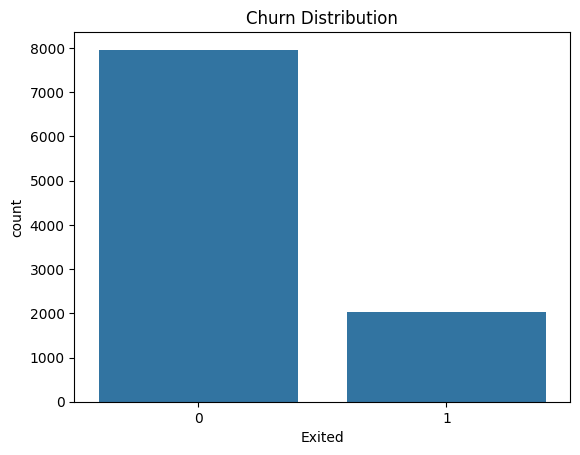

In [ ]:
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution")
plt.show()

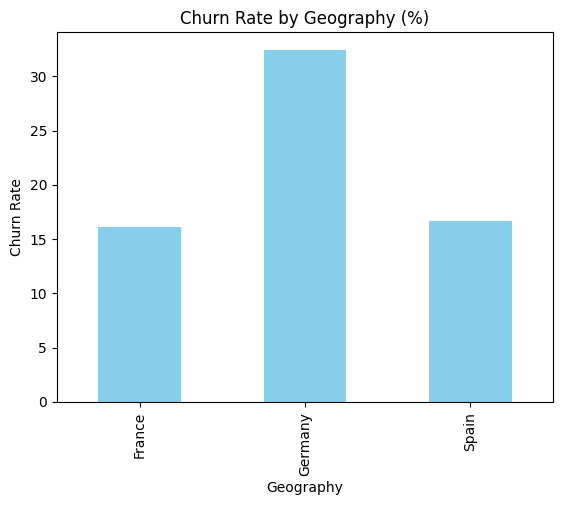

In [ ]:
geo_churn = df.groupby("Geography")["Exited"].mean() * 100
geo_churn.plot(kind="bar", color="skyblue")
plt.title("Churn Rate by Geography (%)")
plt.ylabel("Churn Rate")
plt.show()

/tmp/ipython-input-3369423242.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby("AgeGroup")["Exited"].mean() * 100


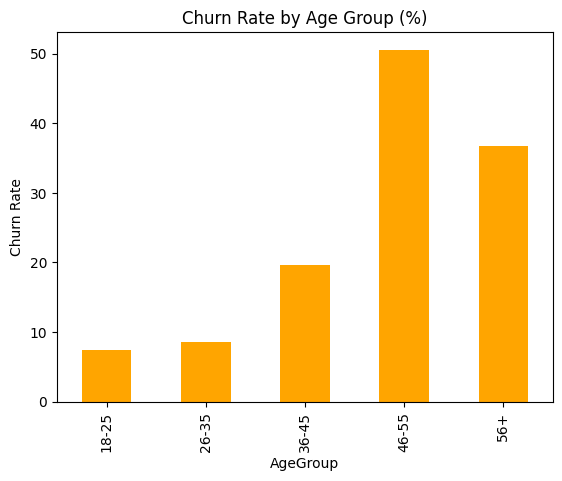

In [ ]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[18,25,35,45,55,100],
                        labels=["18-25","26-35","36-45","46-55","56+"])
age_churn = df.groupby("AgeGroup")["Exited"].mean() * 100
age_churn.plot(kind="bar", color="orange")
plt.title("Churn Rate by Age Group (%)")
plt.ylabel("Churn Rate")
plt.show()

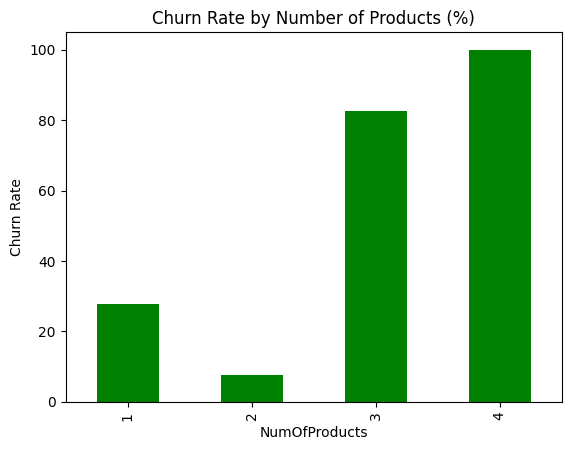

In [ ]:
prod_churn = df.groupby("NumOfProducts")["Exited"].mean() * 100
prod_churn.plot(kind="bar", color="green")
plt.title("Churn Rate by Number of Products (%)")
plt.ylabel("Churn Rate")
plt.show()

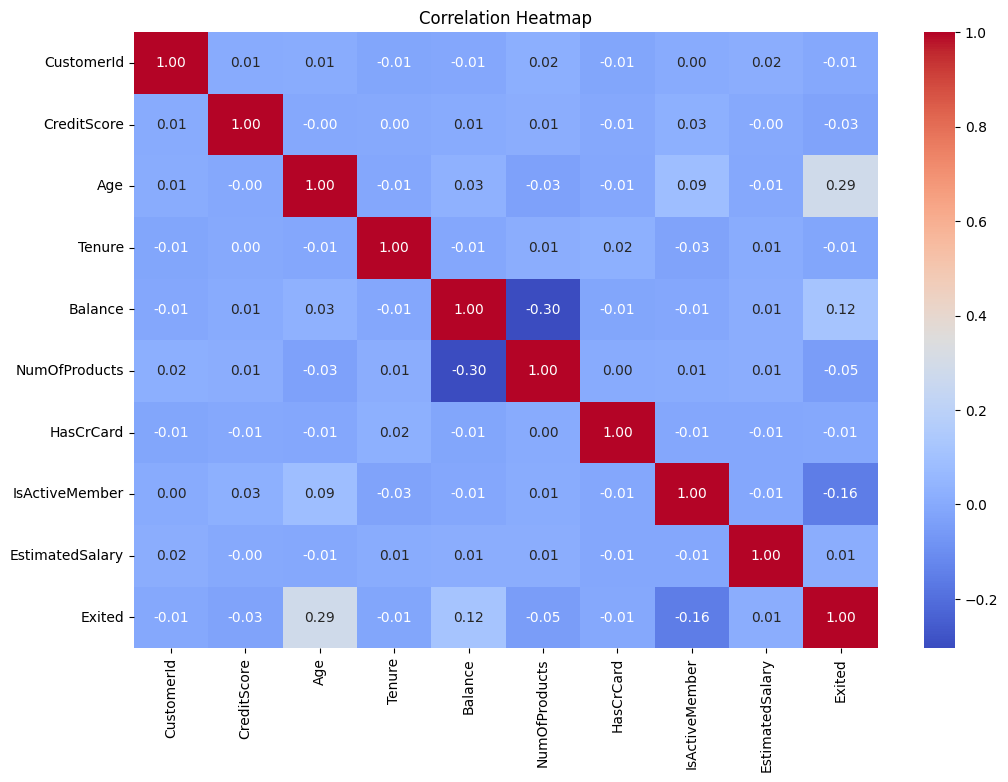

In [ ]:
# Sadece sayısal kolonları seç
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisi
corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


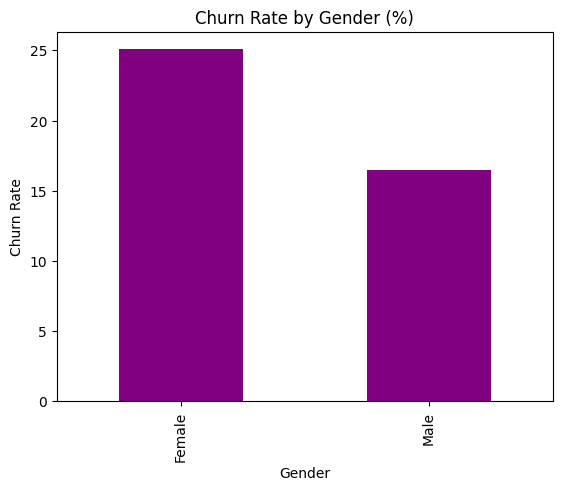

Exited             0          1
Geography                      
France     83.845233  16.154767
Germany    67.556796  32.443204
Spain      83.326605  16.673395


In [ ]:
# Gender ve churn ilişkisi
gender_churn = df.groupby("Gender")["Exited"].mean() * 100
gender_churn.plot(kind="bar", color="purple")
plt.title("Churn Rate by Gender (%)")
plt.ylabel("Churn Rate")
plt.show()

# Geography ve churn ilişkisi (detaylı tablo)
geo_table = pd.crosstab(df["Geography"], df["Exited"], normalize="index") * 100
print(geo_table)


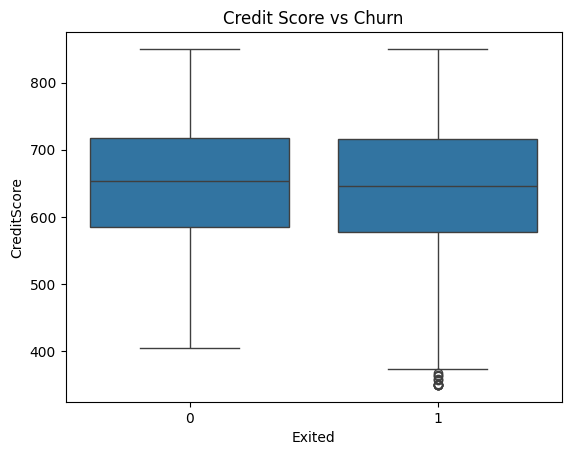

In [ ]:
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Credit Score vs Churn")
plt.show()


In [ ]:
pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100


Exited,0,1
Gender,,
Female,74.928461,25.071539
Male,83.544072,16.455928


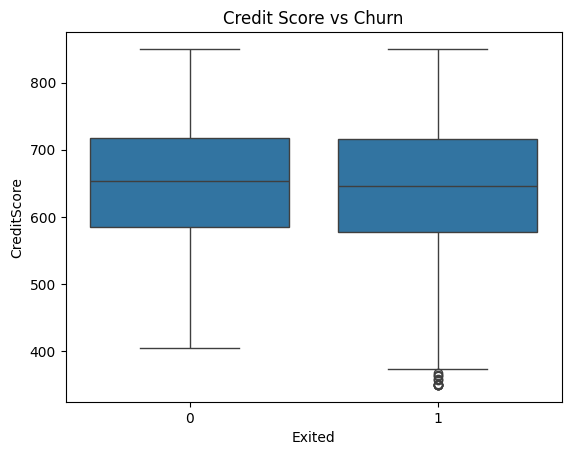

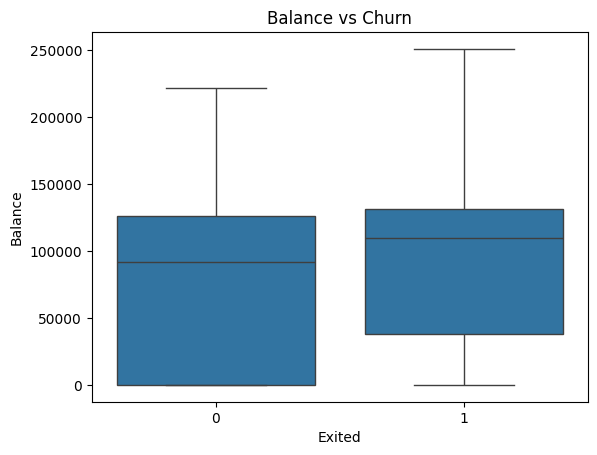

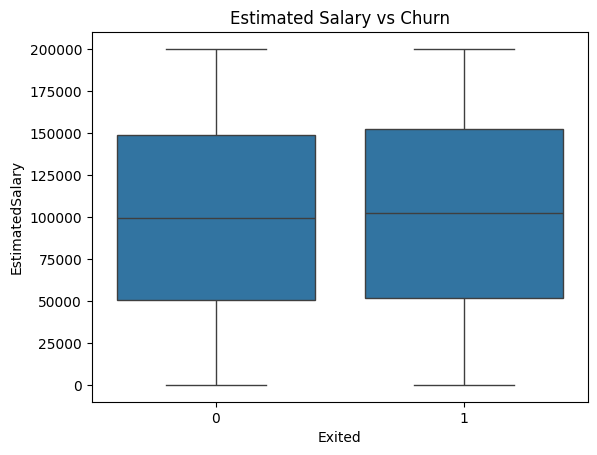

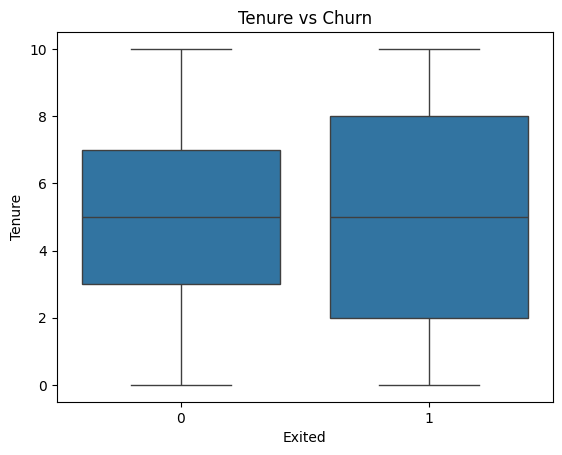

In [ ]:
# Credit Score vs Churn
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Credit Score vs Churn")
plt.show()

# Balance vs Churn
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs Churn")
plt.show()

# Estimated Salary vs Churn
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)
plt.title("Estimated Salary vs Churn")
plt.show()

# Tenure vs Churn
sns.boxplot(x="Exited", y="Tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


Feature Engineering


In [ ]:
# 1. Gereksiz kolonları çıkar
df = df.drop(["CustomerId", "Surname"], axis=1)

# 2. One-hot encoding (Geography, Gender)
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

# 3. Yaş grubu zaten vardı, istersen onu da encode edebiliriz
df = pd.get_dummies(df, columns=["AgeGroup"], drop_first=True)

# 4. Kontrol
print(df.head())
print(df.info())


   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  AgeGroup_26-35  AgeGroup_36-45  \
0            False        False           False            True   
1             True        False           False            True   

In [ ]:
print(df.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'AgeGroup_26-35', 'AgeGroup_36-45',
       'AgeGroup_46-55', 'AgeGroup_56+'],
      dtype='object')


MODELLING


1. train/test splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Exited", axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


2.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.825
[[1529   64]
 [ 286  121]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1593
           1       0.65      0.30      0.41       407

    accuracy                           0.82      2000
   macro avg       0.75      0.63      0.65      2000
weighted avg       0.80      0.82      0.80      2000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3. ROC/AUC

AUC: 0.7825622232401892


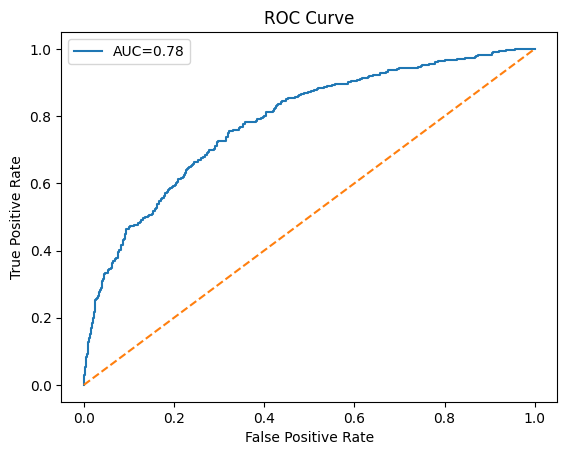

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_prob_rf))


Accuracy: 0.859
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000

AUC: 0.8490069422272811


FEATURE IMPORTANCE

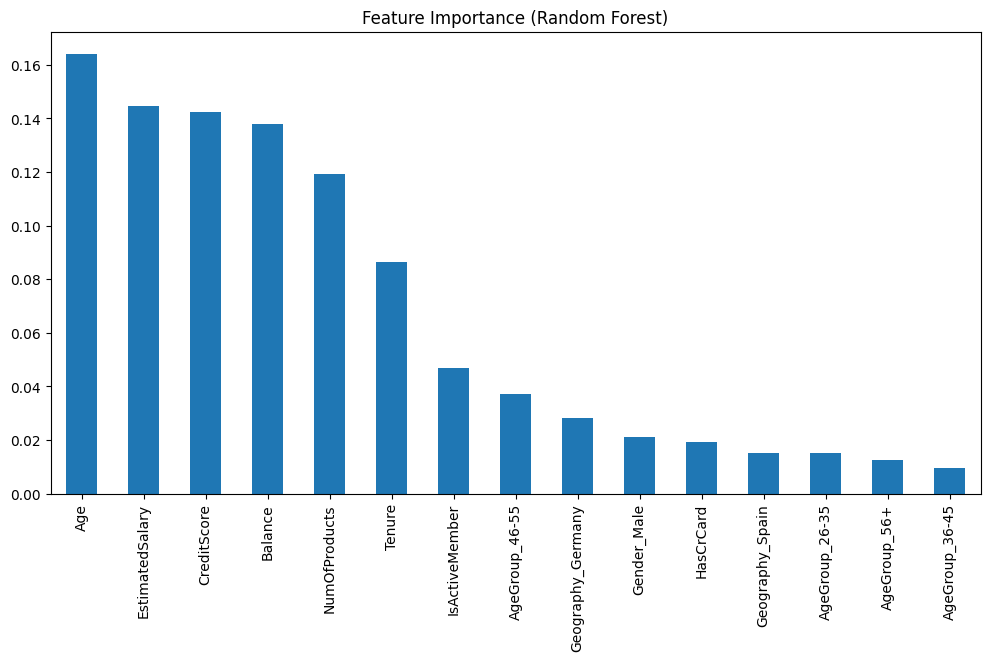

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(rf_model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind="bar", figsize=(12,6))
plt.title("Feature Importance (Random Forest)")
plt.show()


Logistic Regression için Cross-Validation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="roc_auc")
print("Cross-Validation AUC scores:", scores)
print("Mean AUC:", scores.mean())


Cross-Validation AUC scores: [0.79164049 0.78368097 0.78248202 0.78388712 0.76873175]
Mean AUC: 0.7820844709330633


Random Forest için Cross-Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)

scores_rf = cross_val_score(rf, X, y, cv=5, scoring="roc_auc")
print("Cross-Validation AUC scores:", scores_rf)
print("Mean AUC:", scores_rf.mean())


Cross-Validation AUC scores: [0.84124975 0.85559384 0.84543095 0.85368805 0.84675739]
Mean AUC: 0.8485439955648519


XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# XGBoost modeli
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Cross-validation
scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring="roc_auc")

print("Cross-Validation AUC scores:", scores_xgb)
print("Mean AUC:", np.mean(scores_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:04:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:04:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:04:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:04:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:04:42] WARNING: /w

Cross-Validation AUC scores: [0.86043576 0.86475115 0.84830439 0.85509547 0.85270324]
Mean AUC: 0.8562580002252975


AUC comparison plot in Python

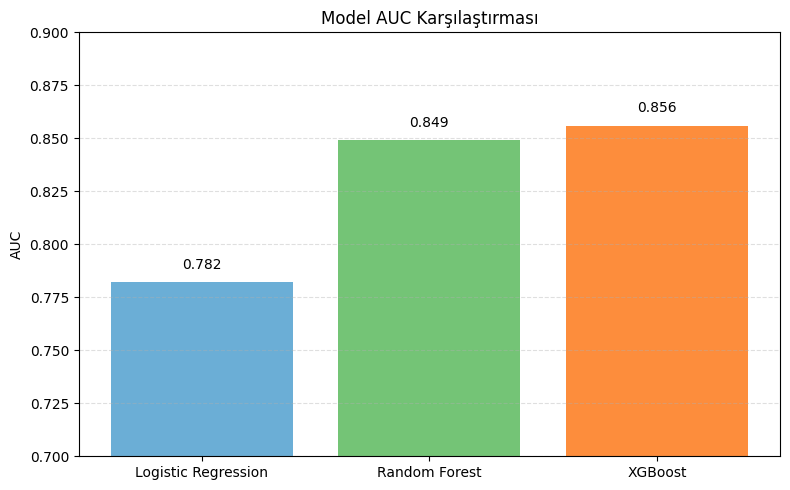

In [ ]:
import matplotlib.pyplot as plt

# Modeller ve AUC ortalamaları (senin sonuçların)
models = ["Logistic Regression", "Random Forest", "XGBoost"]
auc_scores = [0.782, 0.849, 0.856]

# Grafik
plt.figure(figsize=(8, 5))
bars = plt.bar(models, auc_scores, color=["#6baed6", "#74c476", "#fd8d3c"])

# Değer anotasyonları
for bar, score in zip(bars, auc_scores):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.005,
        f"{score:.3f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.ylim(0.7, 0.9)
plt.title("Model AUC Karşılaştırması")
plt.ylabel("AUC")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


FOLD VARIATION

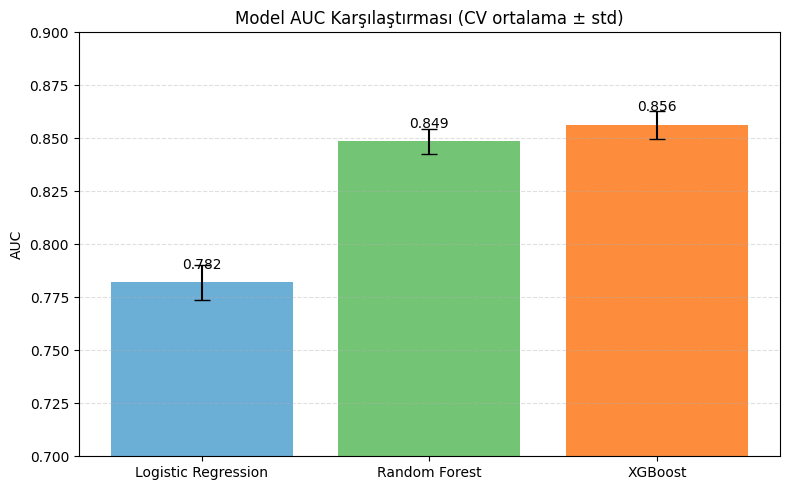

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fold skorları
lr_folds = [0.79164049, 0.78368097, 0.78248202, 0.78388712, 0.76873175]
rf_folds = [0.84124975, 0.85559384, 0.84543095, 0.85368805, 0.84675739]
xgb_folds = [0.86043576, 0.86475115, 0.84830439, 0.85509547, 0.85270324]

models = ["Logistic Regression", "Random Forest", "XGBoost"]
means = [np.mean(lr_folds), np.mean(rf_folds), np.mean(xgb_folds)]
stds = [np.std(lr_folds, ddof=1), np.std(rf_folds, ddof=1), np.std(xgb_folds, ddof=1)]

plt.figure(figsize=(8,5))
bars = plt.bar(models, means, yerr=stds, capsize=6, color=["#6baed6", "#74c476", "#fd8d3c"])

for bar, m in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{m:.3f}", ha="center", va="bottom")

plt.ylim(0.7, 0.9)
plt.title("Model AUC Karşılaştırması (CV ortalama ± std)")
plt.ylabel("AUC")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


ROC Curves

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:05:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


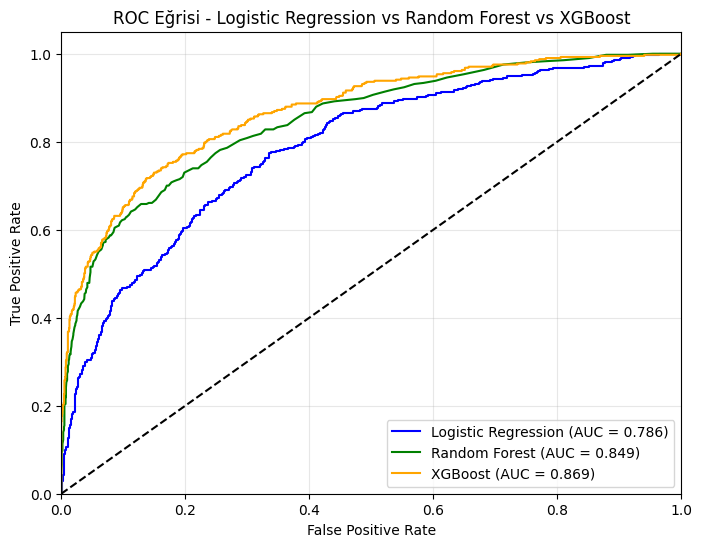

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# ROC plot
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})", color="blue")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})", color="green")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})", color="orange")

plt.plot([0,1],[0,1],"k--")  # random baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi - Logistic Regression vs Random Forest vs XGBoost")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


XGBoost Hiperparametre Arama (GridSearchCV ile)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Parametre aralığı
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Eğit
grid_search.fit(X, y)

# En iyi parametreler ve skor
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

Confusion Matrix

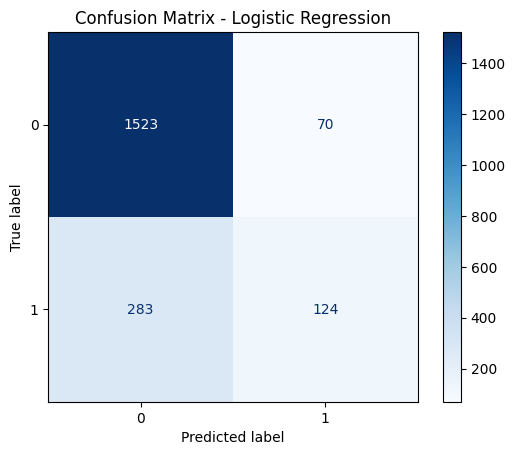

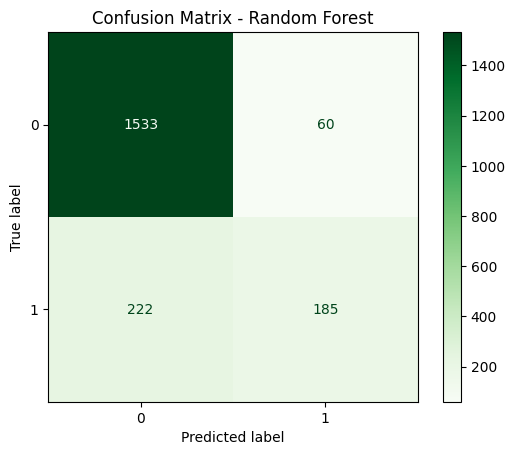

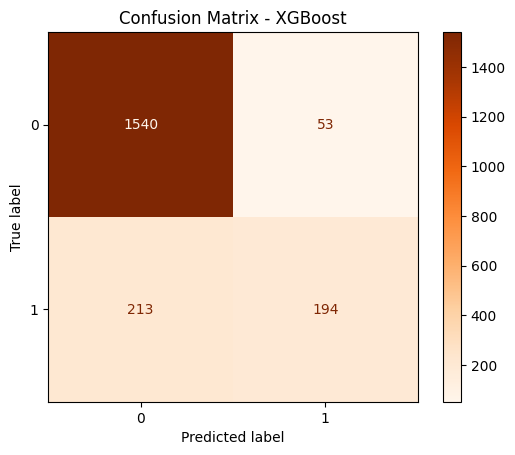

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
y_pred_lr = log_reg.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=log_reg.classes_)
disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Random Forest
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.show()


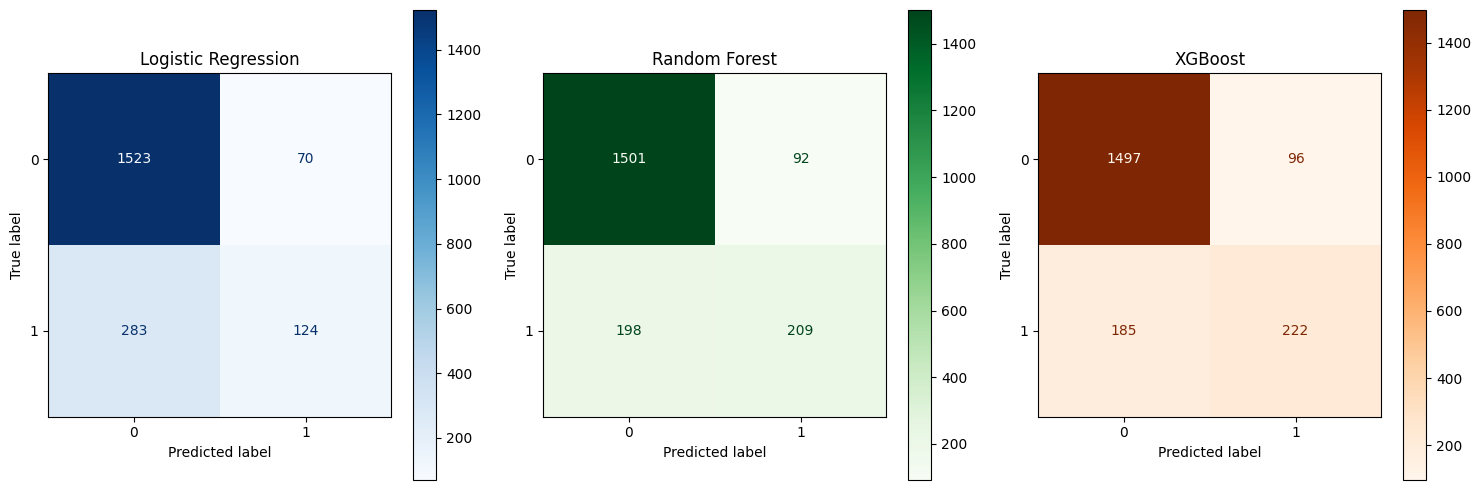

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Confusion matrix değerleri
cm_lr = np.array([[1523, 70],
                  [283, 124]])

cm_rf = np.array([[1501, 92],
                  [198, 209]])

cm_xgb = np.array([[1497, 96],
                   [185, 222]])

fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0,1])
disp_lr.plot(cmap="Blues", ax=axes[0], values_format="d")
axes[0].set_title("Logistic Regression")

# Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0,1])
disp_rf.plot(cmap="Greens", ax=axes[1], values_format="d")
axes[1].set_title("Random Forest")

# XGBoost
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0,1])
disp_xgb.plot(cmap="Oranges", ax=axes[2], values_format="d")
axes[2].set_title("XGBoost")

plt.tight_layout()
plt.show()


Feature Importance

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("/content/drive/MyDrive/Customer Churn Analysis/Bank_Churn.csv")

Saving Bank_Churn.csv to Bank_Churn.csv


In [ ]:
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

X = df.drop("Exited", axis=1)
y = df["Exited"]
features = X.columns

In [ ]:
print(df.dtypes)

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Drop Surnama column

In [ ]:
df = df.drop("Surname", axis=1)


Make dummy columns

In [ ]:
X = df.drop("Exited", axis=1)
X = pd.get_dummies(X, drop_first=True)  # kategorik kolonları sayısala çevirir
y = df["Exited"]
features = X.columns


In [ ]:
print(df.dtypes)

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Logistic Regression katsayıları

In [ ]:

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)
importance_lr = pd.Series(log_reg.coef_[0], index=features)

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
importance_rf = pd.Series(rf_model.feature_importances_, index=features)

# 3. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X, y)
importance_xgb = pd.Series(xgb_model.feature_importances_, index=features)

# Üç modeli tek tabloda birleştirelim
importance_df = pd.DataFrame({
    "Logistic Regression": importance_lr,
    "Random Forest": importance_rf,
    "XGBoost": importance_xgb
})

# Tabloyu Random Forest önemine göre sırala
importance_df = importance_df.sort_values(by="Random Forest", ascending=False)

print(importance_df.head(10))  # ilk 10 özelliği göster



                   Logistic Regression  Random Forest   XGBoost
Age                       6.356018e-02       0.224505  0.113906
NumOfProducts            -1.567279e-04       0.125332  0.330322
Balance                   5.017368e-06       0.121715  0.053102
CreditScore              -7.688279e-04       0.118274  0.032069
EstimatedSalary           6.330422e-07       0.117722  0.031471
CustomerId               -2.503022e-07       0.117387  0.032271
Tenure                   -7.938257e-04       0.067713  0.030134
IsActiveMember           -1.674900e-03       0.037772  0.188093
Geography_Germany         1.198811e-03       0.025763  0.088927
Gender_Male              -1.167917e-03       0.016247  0.044948


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:06:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


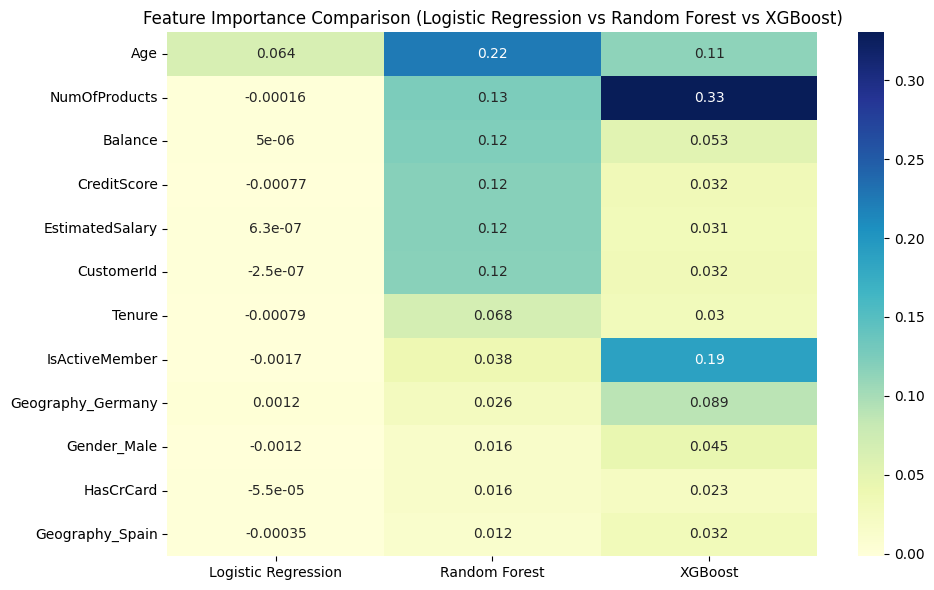

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(importance_df, annot=True, cmap="YlGnBu")
plt.title("Feature Importance Comparison (Logistic Regression vs Random Forest vs XGBoost)")
plt.tight_layout()
plt.show()


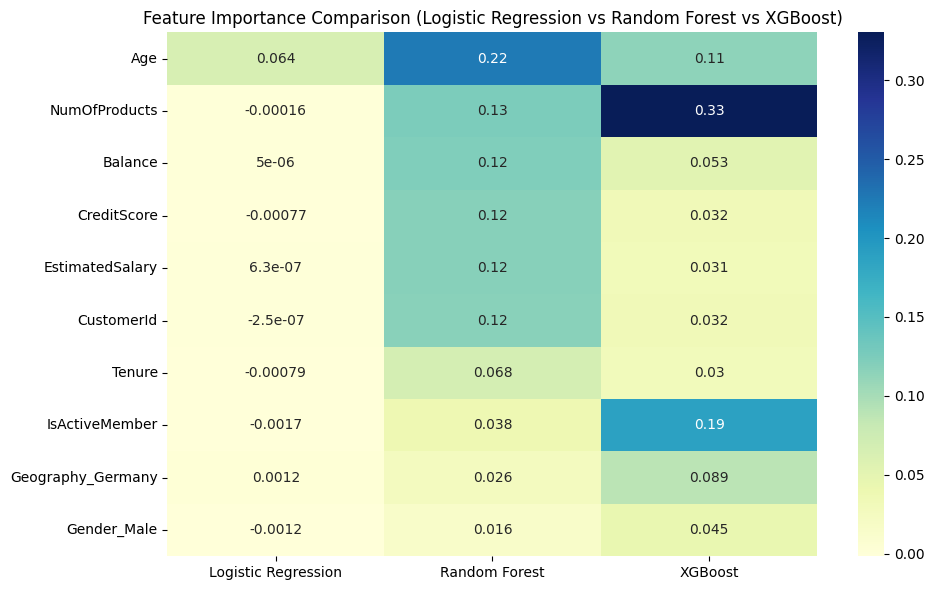

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# İlk 10 özelliği alalım (daha okunabilir olsun)
top_features = importance_df.head(10)

plt.figure(figsize=(10,6))
sns.heatmap(top_features, annot=True, cmap="YlGnBu")
plt.title("Feature Importance Comparison (Logistic Regression vs Random Forest vs XGBoost)")
plt.tight_layout()
plt.show()


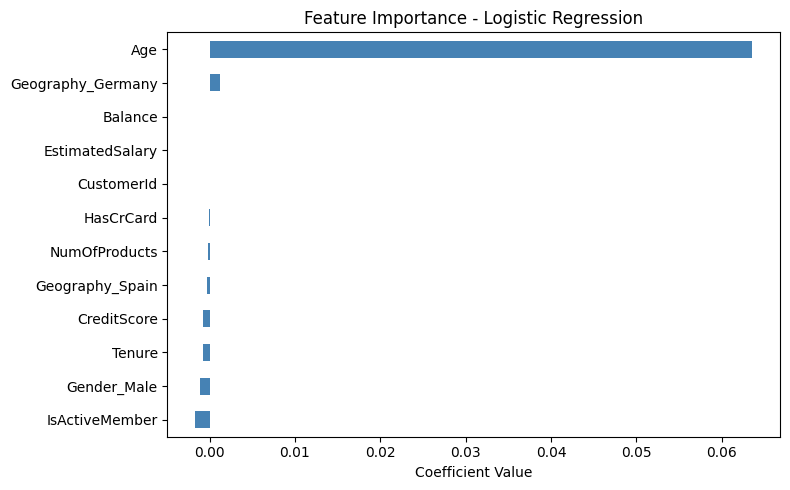

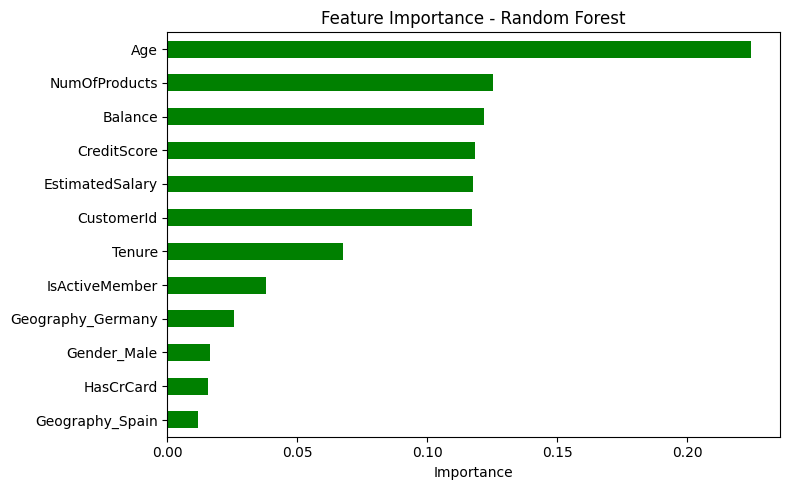

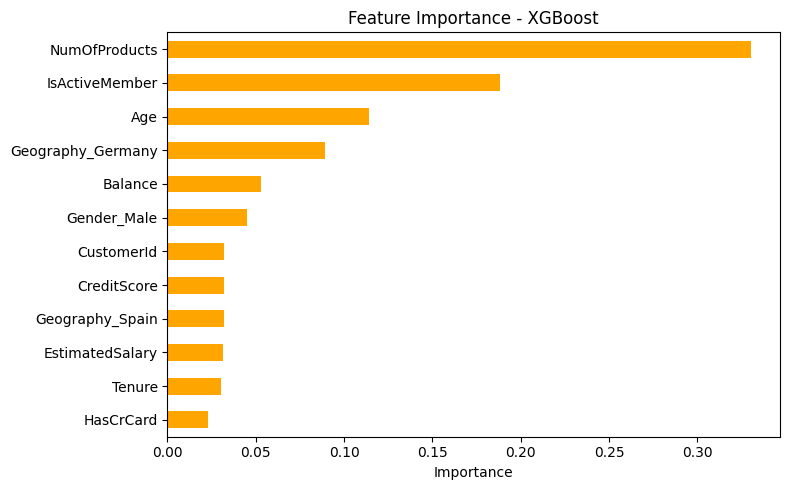

In [ ]:
import matplotlib.pyplot as plt

# Logistic Regression bar chart
plt.figure(figsize=(8,5))
importance_lr.sort_values().plot(kind="barh", color="steelblue")
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

# Random Forest bar chart
plt.figure(figsize=(8,5))
importance_rf.sort_values().plot(kind="barh", color="green")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# XGBoost bar chart
plt.figure(figsize=(8,5))
importance_xgb.sort_values().plot(kind="barh", color="orange")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:07:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


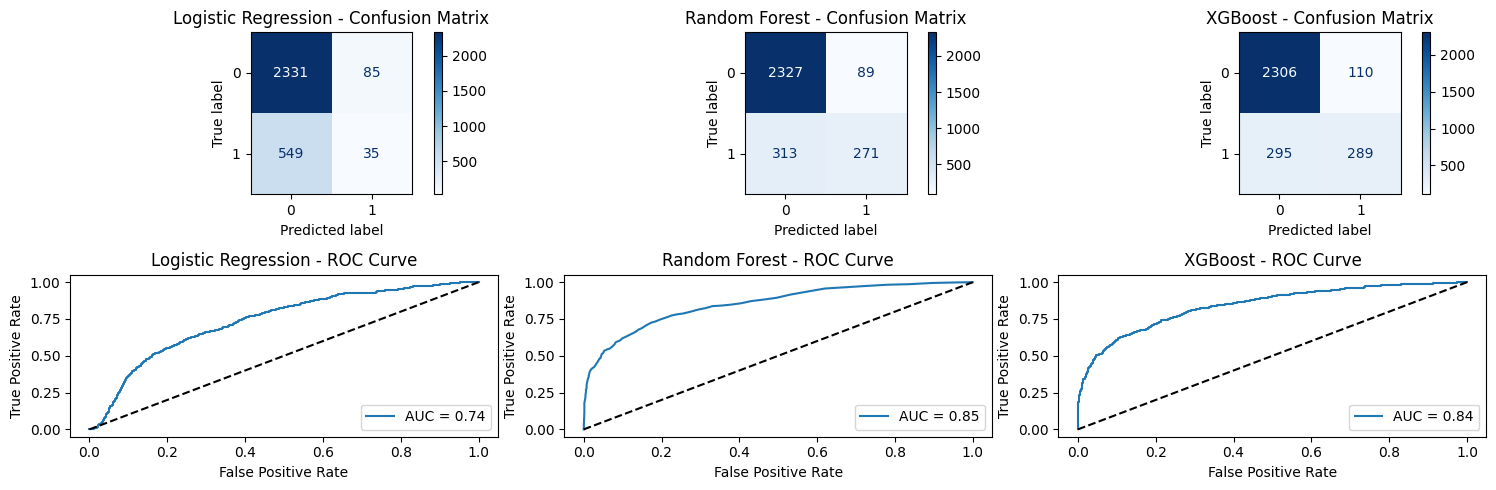

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split

# Veri setini train/test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelleri yeniden tanımla
log_reg = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Confusion Matrix ve ROC eğrisi
plt.figure(figsize=(15,5))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.subplot(2,3,i)
    disp.plot(cmap="Blues", values_format="d", ax=plt.gca())
    plt.title(f"{name} - Confusion Matrix")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.subplot(2,3,i+3)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve")
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Performans metriklerini hesapla
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, auc_score])

# Tabloyu DataFrame olarak göster
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "AUC"])
print(results_df)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:07:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall        F1       AUC
0  Logistic Regression  0.788667   0.291667  0.059932  0.099432  0.739452
1        Random Forest  0.866000   0.752778  0.464041  0.574153  0.852248
2              XGBoost  0.865000   0.724311  0.494863  0.587996  0.842758


# New Section